# From
http://tomaugspurger.github.io/modern-7-timeseries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

## NOTE: pandas_datareader is obsolete
### replacing with pandas.io.data DataReader

### See: 
https://stackoverflow.com/questions/43665016/python-pandas-datareader

In [7]:
import pandas_datareader as pdr

symbols = ['GS', 'MSFT', 'GOOG', 'AAPL']

import datetime
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2010, 1, 1)

data = dict((sym, pdr.DataReader(sym, "yahoo", start, end))
          for sym in symbols)
           
gs = data['GS']

In [8]:
#gs = web.DataReader("GS", data_source='yahoo', start='2006-01-01',
#                    end='2010-01-01')
gs.head().round(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.70,129.44,124.23,128.87,112.34,6188700
2006-01-04,127.35,128.91,126.38,127.09,110.79,4861600
2006-01-05,126.00,127.32,125.61,127.04,110.74,3717400
2006-01-06,127.29,129.25,127.29,128.84,112.31,4319600
2006-01-09,128.50,130.62,128.00,130.39,113.66,4723500


## Index is a pandas.Timestamp

In [9]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

A Timestamp is mostly compatible with the datetime.datetime class, but much amenable to storage in arrays.

Working with Timestamps can be awkward, so Series and DataFrames with DatetimeIndexes have some special slicing rules. The first special case is partial-string indexing. Say we wanted to select all the days in 2006. Even with Timestamp's convenient constructors, it's a pai



In [10]:
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


Thanks to partial-string indexing, it's as simple as

In [11]:
gs.loc['2006'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


## Change data frequency by resampling

### NOTE: the frequency arg. is given in CALENDAR days, NOT number of data points
So each element is exactly 5 days apart

In [14]:
gs.resample("5d").mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.834999,128.730002,125.877501,127.959997,111.544294,4771825
2006-01-08,130.349998,132.645000,130.205002,131.660000,114.769649,4664300
2006-01-13,131.510002,133.395005,131.244995,132.924995,115.872357,3258250
2006-01-18,132.210002,133.853333,131.656667,132.543335,115.611125,4997766
2006-01-23,133.771997,136.083997,133.310001,135.153998,118.035918,3968500


## NOTE: 01/01/2006 is a Sunday, so weeks begin on Sunday ?

In [15]:
gs.resample("W").agg(['mean', 'sum']).head()

Open                    High                     Low  \
                  mean         sum        mean         sum        mean   
Date                                                                     
2006-01-08  126.834999  507.339996  128.730002  514.920006  125.877501   
2006-01-15  130.684000  653.419998  132.848001  664.240006  130.544000   
2006-01-22  131.907501  527.630005  133.672501  534.690003  131.389999   
2006-01-29  133.771997  668.859986  136.083997  680.419983  133.310001   
2006-02-05  140.900000  704.500000  142.467999  712.339996  139.937998   

                             Close               Adj Close              \
                   sum        mean         sum        mean         sum   
Date                                                                     
2006-01-08  503.510002  127.959997  511.839988  111.544294  446.177177   
2006-01-15  652.720001  131.979999  659.899994  115.048592  575.242958   
2006-01-22  525.559998  132.555000  530.220000  115.603432  462.413728   
2006-01-29  666.550003  135.153998  675.769989  118.035918  590.179588   
2006-02-05  699.689988  141.618002  708.090011  123.681204  618.406020   

             Volume            
               mean       sum  
Date                           
2006-01-08  4771825  19087300  
2006-01-15  4310420  21552100  
2006-01-22  4653725  18614900  
2006-01-29  3968500  19842500  
2006-02-05  3920120  19600600

## Upsample to higher frequency

In [16]:
gs.resample("6H").mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03 00:00:00,126.699997,129.440002,124.230003,128.869995,112.337547,6188700.0
2006-01-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,127.349998,128.910004,126.379997,127.089996,110.785889,4861600.0


## Rolling timeseries
### NOTE: POST Pandas 0.19, can have rolling series can have a frequency if index is pd.Timestamp
###     does NOT have to be integer positions to be rolling, can be rolling '2d'

In [36]:
pd.__version__

'0.18.1'

In [24]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4, 5]})
df
df.rolling(2).sum()

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0
5,5.0


,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN
5,9.0


In [35]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4, 5, 6]},
....:                 index = [pd.Timestamp('20130101 09:00:00'),
....:                          pd.Timestamp('20130101 09:00:02'),
....:                          pd.Timestamp('20130101 09:00:03'),
....:                          pd.Timestamp('20130101 09:00:05'),
....:                          pd.Timestamp('20130101 09:00:06'),
                              pd.Timestamp('20130101 10:00:00'),
                               pd.Timestamp('20130101 10:01:00')
                              ])

df
df.rolling(freq='2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0
2013-01-01 10:00:00,5.0
2013-01-01 10:01:00,6.0


TypeError: rolling() missing 1 required positional argument: 'window'

In [ ]:
gs.Close.plot(label='Raw')
gs.Close.rolling(28).mean().plot(label='28D MA')

In [27]:
gs.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [18]:
gs.Close.rolling(28)

Rolling [window=28,center=False,axis=0]

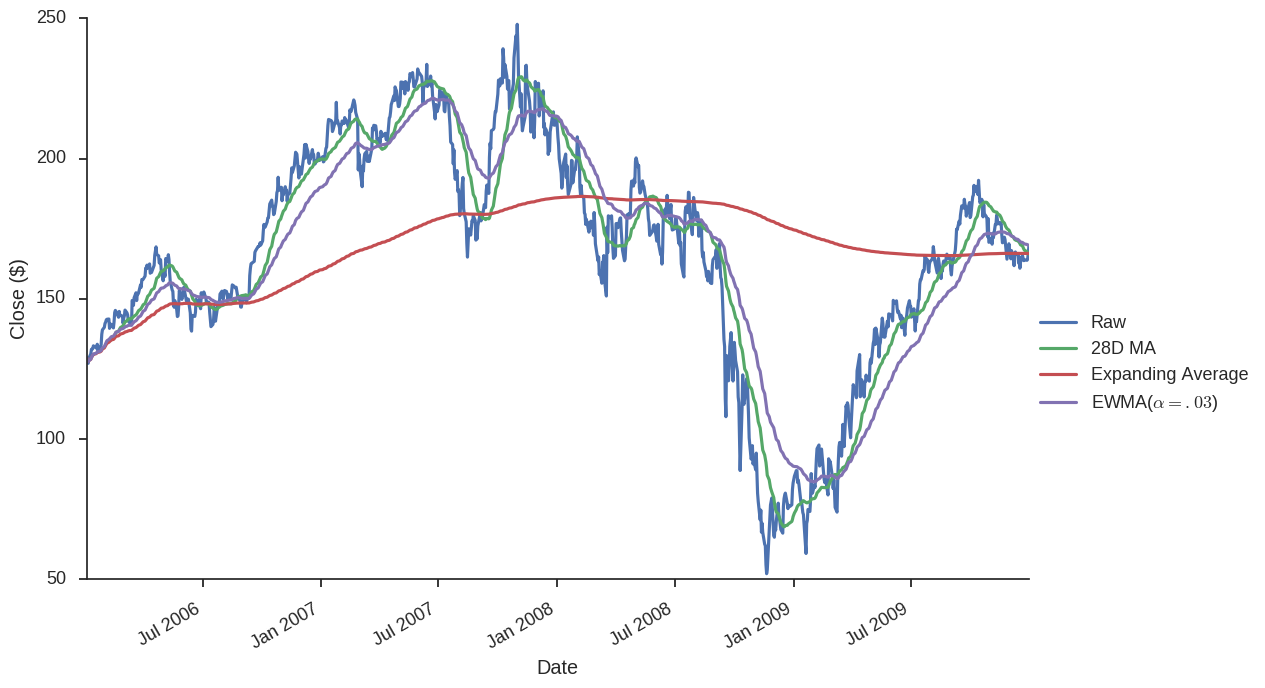

In [17]:
gs.Close.expanding().mean().plot(label='Expanding Average')
gs.Close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [37]:
roll = gs.Close.rolling(30, center=True)
roll

Rolling [window=30,center=True,axis=0]

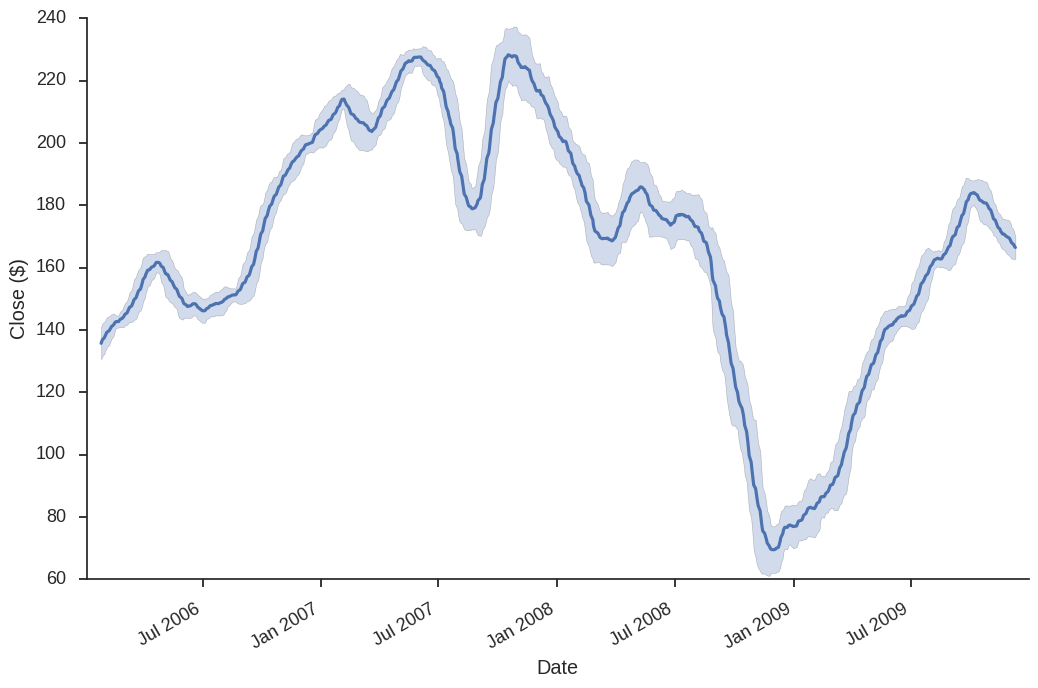

In [45]:
m = roll.agg(['mean', 'std'])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25
               )
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

## DateOffset

In [46]:
gs.index
gs.index + pd.DateOffset(months=3, days=-2)

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

## Holiday calendars

In [48]:
from pandas.tseries.holiday import USColumbusDay
USColumbusDay.dates('2015-01-01', '2020-01-01')


DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

## Create own trading calendar
See https://stackoverflow.com/questions/33094297/create-trading-holiday-calendar-with-pandas

In [67]:
from pandas.tseries.holiday import get_calendar, HolidayCalendarFactory, GoodFriday
from datetime import datetime

cal = get_calendar('USFederalHolidayCalendar')  # Create calendar instance
type(cal.rules)
type(cal.rules[0])
print ("Original calendar has ", len(cal.rules), " rules:\n", cal.rules, "\n\n")
                            # Remove Columbus Day rule
tradingCal = HolidayCalendarFactory('TradingCalendar', cal, GoodFriday)


#new instance of class since rules changed on underlying object
cal1 = tradingCal()
print("\n")
print ("Modified calendar has ", len(cal1.rules), " rules:\n", cal1.rules, "\n\n")


list

pandas.tseries.holiday.Holiday

Original calendar has  6  rules:
 [Holiday: New Years Day (month=1, day=1, observance=<function nearest_workday at 0x7f82671ddd90>), Holiday: Dr. Martin Luther King Jr. (month=1, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>), Holiday: Presidents Day (month=2, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>), Holiday: MemorialDay (month=5, day=31, offset=<DateOffset: kwds={'weekday': MO(-1)}>), Holiday: July 4th (month=7, day=4, observance=<function nearest_workday at 0x7f82671ddd90>), Holiday: Labor Day (month=9, day=1, offset=<DateOffset: kwds={'weekday': MO(+1)}>)] 




Modified calendar has  7  rules:
 [Holiday: Presidents Day (month=2, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>), Holiday: Good Friday (month=1, day=1, offset=[<Easter>, <-2 * Days>]), Holiday: New Years Day (month=1, day=1, observance=<function nearest_workday at 0x7f82671ddd90>), Holiday: Dr. Martin Luther King Jr. (month=1, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>), Holiday: Memor

## Timezones

In [79]:
# tz naiive -> tz aware..... to desired UTC
(gs.tz_localize('US/Eastern').
    # tz_convert('UTC').
    head()
)

(gs.tz_localize('US/Eastern').
    tz_convert('UTC').
    head()
)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03 00:00:00-05:00,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04 00:00:00-05:00,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05 00:00:00-05:00,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06 00:00:00-05:00,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09 00:00:00-05:00,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03 05:00:00+00:00,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04 05:00:00+00:00,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05 05:00:00+00:00,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06 05:00:00+00:00,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09 05:00:00+00:00,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


# Modelling Timeseries
## Won't work as this depends on "utils" which seems to be local to the author of the webpage

In [80]:
import os
import io
import glob
import zipfile
from utils import download_timeseries

import statsmodels.api as sm


def download_many(start, end):
    months = pd.period_range(start, end=end, freq='M')
    # We could easily parallelize this loop.
    for i, month in enumerate(months):
        download_timeseries(month)


def time_to_datetime(df, columns):
    '''
    Combine all time items into datetimes.

    2014-01-01,1149.0 -> 2014-01-01T11:49:00
    '''
    def converter(col):
        timepart = (col.astype(str)
                       .str.replace('\.0$', '')  # NaNs force float dtype
                       .str.pad(4, fillchar='0'))
        return  pd.to_datetime(df['fl_date'] + ' ' +
                               timepart.str.slice(0, 2) + ':' +
                               timepart.str.slice(2, 4),
                               errors='coerce')
        return datetime_part
    df[columns] = df[columns].apply(converter)
    return df


def read_one(fp):
    df = (pd.read_csv(fp, encoding='latin1')
            .rename(columns=str.lower)
            .drop('unnamed: 6', axis=1)
            .pipe(time_to_datetime, ['dep_time', 'arr_time', 'crs_arr_time',
                                     'crs_dep_time'])
            .assign(fl_date=lambda x: pd.to_datetime(x['fl_date'])))
    return df

ImportError: No module named 'utils'